In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./combinedData.csv',index_col=None, header=0,sep=',')

In [3]:
df.head()
df2 = df.drop(['Estimated', 'COUNTY', 'RETIRED','STATION','DATE','DAY'], axis = 1)
df2.head()

,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,10 am,...,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm,12 mid,TOTAL,Station number,Direction
0,363,352,240,127,99,61,102,125,276,317,...,758,767,677,489,380,301,233,10980,365,North
1,157,94,69,56,45,102,174,262,281,404,...,1035,838,743,561,484,328,193,12369,365,North
2,143,76,51,46,59,169,439,624,600,627,...,2188,1507,1026,730,636,411,312,18285,365,North
3,202,125,114,75,73,160,437,623,544,632,...,2088,1587,1024,830,707,458,354,18896,365,North
4,203,116,120,81,81,177,396,582,581,603,...,2188,1610,1048,841,772,543,375,19271,365,North


In [4]:
group1 = df2.groupby(['Station number','Direction'])
group1

In [5]:
STANDARD_DEV = group1.std()
MEAN = group1.mean()
MEAN.head()

1 am       2 am       3 am       4 am  \
Station number Direction                                                
8              East         1.640993   1.237817   0.700128   0.459573   
               North        1.785714   1.107143   0.821429   0.500000   
               South        1.071429   0.714286   0.357143   0.500000   
               West         1.291477   0.839022   0.599927   0.432196   
26             North      111.533251  88.068358  83.696876  87.356944   

                                5 am        6 am        7 am        8 am  \
Station number Direction                                                   
8              East         0.403541    1.732980    4.117905   13.843767   
               North        0.321429    1.750000    2.642857    5.821429   
               South        0.535714    2.607143    3.750000    8.892857   
               West         0.475817    2.315204    5.013689   13.081949   
26             North      122.058460  199.324157  269.670275  352.252706   

                                9 am       10 am     ...             4 pm  \
Station number Direction                             ...                    
8              East        15.052747   14.661982     ...        20.209162   
               North       10.107143   11.678571     ...        13.071429   
               South        7.892857   10.321429     ...        10.642857   
               West        11.620186   12.268297     ...        20.911663   
26             North      391.448500  484.120012     ...       773.401175   

                                5 pm        6 pm        7 pm        8 pm  \
Station number Direction                                                   
8              East        21.426355   22.715094   18.309181   12.589524   
               North       15.678571   14.892857   12.250000    7.535714   
               South       11.607143   10.321429    8.321429    6.964286   
               West        17.198211   17.196204   13.776967   10.993612   
26             North      765.510362  707.325704  585.245902  479.120940   

                                9 pm       10 pm       11 pm      12 mid  \
Station number Direction                                                   
8              East         9.946341    7.866216    4.744296    2.595729   
               North        7.464286    7.321429    5.285714    3.428571   
               South        6.535714    6.035714    3.714286    1.678571   
               West        10.384559    8.670013    4.311006    2.231794   
26             North      396.426539  313.426848  236.156820  159.299722   

                                TOTAL  
Station number Direction               
8              East        252.708158  
               North       194.142857  
               South       164.392857  
               West        227.891769  
26             North      9877.120322  

[5 rows x 25 columns]

In [6]:
spec_mean = lambda df: (df -df.mean())/df.std()
df3 = group1.transform(spec_mean)
df3.head()

,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,10 am,...,4 pm,5 pm,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm,12 mid,TOTAL
0,2.194201,4.653574,4.320919,3.293282,1.377226,-1.659209,-1.824835,-2.284673,-2.520758,-2.186980,...,-2.330403,-2.160387,-2.083081,-1.867540,-1.728019,-2.112331,-2.152480,-1.614283,-1.165744,-2.380684
1,-0.763915,-0.816970,-1.037544,-0.731437,-1.423208,-1.047654,-1.332469,-1.561944,-2.484454,-1.713713,...,-1.399944,-1.485537,-1.566065,-1.681121,-1.443073,-1.744724,-1.522080,-1.408830,-1.557990,-1.983577
2,-0.964952,-1.198636,-1.601593,-1.298299,-0.697169,-0.048282,0.479715,0.347747,-0.168270,-0.500625,...,0.272085,0.329512,0.585989,0.075415,-0.221258,-0.881870,-0.600728,-0.777253,-0.391059,-0.292228
3,-0.117725,-0.159656,0.372578,0.345601,0.028869,-0.182526,0.466038,0.342472,-0.574873,-0.473425,...,0.325721,0.386986,0.399341,0.285464,-0.229893,-0.371305,-0.170359,-0.419612,0.020799,-0.117547
4,-0.103365,-0.350489,0.560594,0.685718,0.443748,0.071046,0.185662,0.126181,-0.306224,-0.631181,...,0.304733,0.522326,0.585989,0.345853,-0.126276,-0.315143,0.223640,0.227184,0.226728,-0.010336


In [7]:
test = df2[(df2['Station number']==228) & (df2['Direction']=='North')]
std = test.std()
mean = test.mean()

In [8]:
df3.columns = df3.columns + "_zscore"
df3.head()

,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,4 pm_zscore,5 pm_zscore,6 pm_zscore,7 pm_zscore,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore
0,2.194201,4.653574,4.320919,3.293282,1.377226,-1.659209,-1.824835,-2.284673,-2.520758,-2.186980,...,-2.330403,-2.160387,-2.083081,-1.867540,-1.728019,-2.112331,-2.152480,-1.614283,-1.165744,-2.380684
1,-0.763915,-0.816970,-1.037544,-0.731437,-1.423208,-1.047654,-1.332469,-1.561944,-2.484454,-1.713713,...,-1.399944,-1.485537,-1.566065,-1.681121,-1.443073,-1.744724,-1.522080,-1.408830,-1.557990,-1.983577
2,-0.964952,-1.198636,-1.601593,-1.298299,-0.697169,-0.048282,0.479715,0.347747,-0.168270,-0.500625,...,0.272085,0.329512,0.585989,0.075415,-0.221258,-0.881870,-0.600728,-0.777253,-0.391059,-0.292228
3,-0.117725,-0.159656,0.372578,0.345601,0.028869,-0.182526,0.466038,0.342472,-0.574873,-0.473425,...,0.325721,0.386986,0.399341,0.285464,-0.229893,-0.371305,-0.170359,-0.419612,0.020799,-0.117547
4,-0.103365,-0.350489,0.560594,0.685718,0.443748,0.071046,0.185662,0.126181,-0.306224,-0.631181,...,0.304733,0.522326,0.585989,0.345853,-0.126276,-0.315143,0.223640,0.227184,0.226728,-0.010336


In [9]:
pd.concat([df2,df3], axis =1)

,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,10 am,...,4 pm_zscore,5 pm_zscore,6 pm_zscore,7 pm_zscore,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore
0,363,352,240,127,99,61,102,125,276,317,...,-2.330403,-2.160387,-2.083081,-1.867540,-1.728019,-2.112331,-2.152480,-1.614283,-1.165744,-2.380684
1,157,94,69,56,45,102,174,262,281,404,...,-1.399944,-1.485537,-1.566065,-1.681121,-1.443073,-1.744724,-1.522080,-1.408830,-1.557990,-1.983577
2,143,76,51,46,59,169,439,624,600,627,...,0.272085,0.329512,0.585989,0.075415,-0.221258,-0.881870,-0.600728,-0.777253,-0.391059,-0.292228
3,202,125,114,75,73,160,437,623,544,632,...,0.325721,0.386986,0.399341,0.285464,-0.229893,-0.371305,-0.170359,-0.419612,0.020799,-0.117547
4,203,116,120,81,81,177,396,582,581,603,...,0.304733,0.522326,0.585989,0.345853,-0.126276,-0.315143,0.223640,0.227184,0.226728,-0.010336
5,223,155,129,89,76,167,381,536,599,601,...,0.451648,0.548282,0.384409,0.364232,0.206161,-0.279403,0.223640,0.843543,1.501526,0.276415
6,312,200,161,104,55,92,189,297,431,654,...,-1.288009,-1.227833,-1.306624,-1.045722,-1.045875,-1.096307,-0.752266,0.356543,0.726841,-0.966366
7,296,235,166,83,61,72,120,174,336,483,...,-1.684445,-1.591214,-1.775111,-1.565594,-1.775510,-2.158281,-2.079741,-1.850174,-1.803144,-1.972141
8,103,67,48,53,53,162,424,570,556,572,...,0.202126,0.375862,0.348946,0.041282,-0.398270,-0.687855,-0.334020,-0.351128,-0.292998,-0.376281
9,183,110,92,74,72,154,416,628,556,674,...,0.267421,0.540866,0.498264,0.261833,-0.139228,-0.003699,0.211517,-0.594628,-0.498927,-0.119548


In [11]:
bins = [-1000,-2,-1,-.1,.1,1,2,1000]
names = ['below extreme','-z2', '-z1','norm','z1', 'z2','above extreme']

In [16]:
df4 = df3.apply(lambda x: pd.cut(x, bins=bins,labels= names))

In [17]:
df4.head()

,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,4 pm_zscore,5 pm_zscore,6 pm_zscore,7 pm_zscore,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore
0,above extreme,above extreme,above extreme,above extreme,z2,-z2,-z2,below extreme,below extreme,below extreme,...,below extreme,below extreme,below extreme,-z2,-z2,below extreme,below extreme,-z2,-z2,below extreme
1,-z1,-z1,-z2,-z1,-z2,-z2,-z2,-z2,below extreme,-z2,...,-z2,-z2,-z2,-z2,-z2,-z2,-z2,-z2,-z2,-z2
2,-z1,-z2,-z2,-z2,-z1,norm,z1,z1,-z1,-z1,...,z1,z1,z1,norm,-z1,-z1,-z1,-z1,-z1,-z1
3,-z1,-z1,z1,z1,norm,-z1,z1,z1,-z1,-z1,...,z1,z1,z1,z1,-z1,-z1,-z1,-z1,norm,-z1
4,-z1,-z1,z1,z1,z1,norm,z1,z1,-z1,-z1,...,z1,z1,z1,z1,-z1,-z1,z1,z1,z1,norm


In [25]:
pd.value_counts(df4['1 am_zscore'].values)

-z1              417433
z1               185373
z2                93157
-z2               72891
norm              66338
above extreme     34355
below extreme      1683
dtype: int64

In [28]:
result = df4.apply(pd.value_counts).fillna(0); result

,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,4 pm_zscore,5 pm_zscore,6 pm_zscore,7 pm_zscore,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore
-z1,417433,416621,397377,355981,276724,176640,123744,114188,191511,263974,...,289469,267217,264330,314326,337429,339866,340123,359555,392087,275538
-z2,72891,70409,77677,86684,125011,184460,207461,201163,140180,101947,...,105510,117254,121054,98812,92956,92420,93893,94492,83162,102187
above extreme,34355,33859,31194,25964,20732,14080,9274,6661,12018,19590,...,23940,21712,21904,27285,30246,29084,29733,30957,32502,20766
below extreme,1683,1890,2554,5076,4321,1804,2321,7453,18581,21032,...,14740,14734,14094,12880,10687,10553,9753,4568,2384,18990
norm,66338,69918,74281,79780,72646,57643,48698,44904,59910,75402,...,71393,69292,66696,73164,75855,74139,74779,72752,72257,72164
z1,185373,190949,204421,236501,289178,342904,387378,412434,361791,302076,...,275518,290035,290925,254887,235593,233607,231398,218226,198687,285901
z2,93157,87584,83726,81244,82618,93699,92354,84427,87239,87209,...,90660,90986,92227,89876,88464,91561,91551,90680,90151,95684


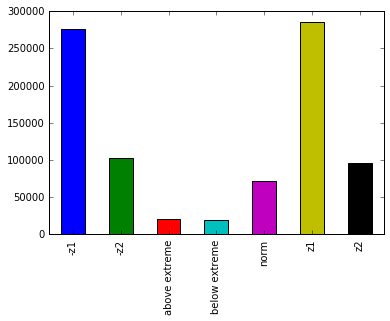

In [31]:
result.TOTAL_zscore.plot(kind = 'bar')

In [36]:
df5 = result.drop(['TOTAL_zscore'],axis = 1)

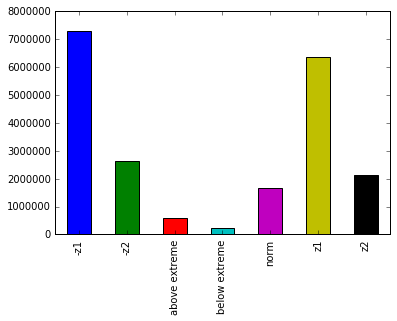

In [40]:
df5.sum(axis =1).plot(kind = 'bar')